In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import obspy
import numpy as np
import glob 

In [2]:
files = glob.glob('/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/*.mseed')
print(len(files))
print(files)

69
['/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1120.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1133.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1155.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1157.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1168.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1215.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1153.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1146.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1148.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1210.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1123.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1116.5B.mseed', '/home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.9901

In [3]:
t0 = 1e7
t1 = 2e7

dh1_data = np.zeros([len(files),int(t1-t0)])
dh2_data = np.zeros([len(files),int(t1-t0)])
dhz_data = np.zeros([len(files),int(t1-t0)])
station_list = []

In [4]:
dh1_data.shape

(69, 10000000)

In [5]:
for i,file in enumerate(files):
    st = obspy.read(file)
    station_list.append(st[0].stats['station'])
    
    if st[0].stats['channel']=='DH1': 
        dh1_data[i]=st[0].data[int(t0):int(t1)]
    else: print('ST0 NOT DH1', file)
    if st[1].stats['channel']=='DH2': 
        dh2_data[i]=st[1].data[int(t0):int(t1)]
    else: print('ST1 NOT DH2', file)
    if st[2].stats['channel']=='DHZ': 
        dhz_data[i]=st[2].data[int(t0):int(t1)]
    else: print('S2 NOT DHZ', file)

S2 NOT DHZ /home/birniece/Documents/data/ToC2ME/21Nov24Nov/TOC2ME.99017/1182.5B.mseed


In [6]:
st[0].stats

         network: 5B
         station: 1175
        location: 00
         channel: DH1
       starttime: 2016-11-22T00:00:00.000000Z
         endtime: 2016-11-24T00:00:00.000000Z
   sampling_rate: 500.0
           delta: 0.002
            npts: 86400001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 757921, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 512, 'filesize': 1164166656})

In [14]:
1e7/500/60

333.3333333333333

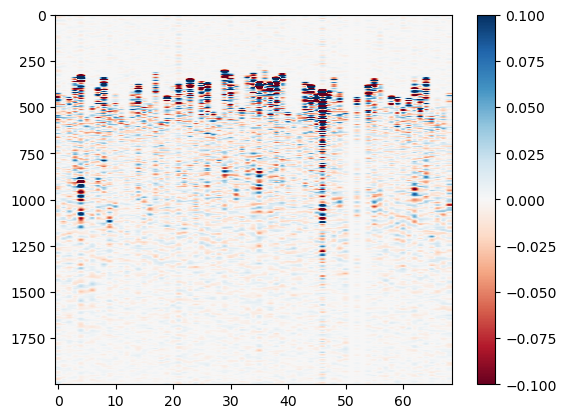

In [7]:
plt.imshow(dhz_data[:,int(0.815e7):int(0.8152e7)].T, aspect='auto', cmap='RdBu', vmin=-0.1, vmax=0.1)
plt.colorbar()

In [17]:
np.savez('/home/birniece/Documents/data/ToC2ME/21Nov24Nov/SmallSubsection.npz',
          dhz = dhz_data,
          dh1 = dh1_data,
          dh2 = dh2_data,
          stations = station_list,
          start_index = 1e7)

In [ ]:
plt.imshow(dhz_data[:,int(0.815e7):int(0.8152e7)].T, aspect='auto', cmap='RdBu', vmin=-0.1, vmax=0.1)
plt.colorbar()

In [8]:
dt = st[0].stats['delta']
print(st)

3 Trace(s) in Stream:
5B.1175.00.DH1 | 2016-11-22T00:00:00.000000Z - 2016-11-24T00:00:00.000000Z | 500.0 Hz, 86400001 samples
5B.1175.00.DH2 | 2016-11-22T00:00:00.000000Z - 2016-11-24T00:00:00.000000Z | 500.0 Hz, 86400001 samples
5B.1175.00.DHZ | 2016-11-22T00:00:00.000000Z - 2016-11-24T00:00:00.000000Z | 500.0 Hz, 86400001 samples


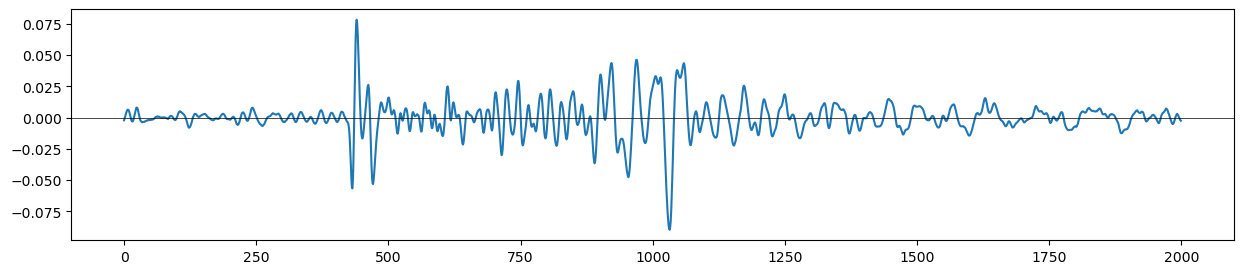

In [9]:
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(st[2].data[int(1.815e7):int(1.8152e7)])
ax.axhline(0, linewidth=0.5,c='k')

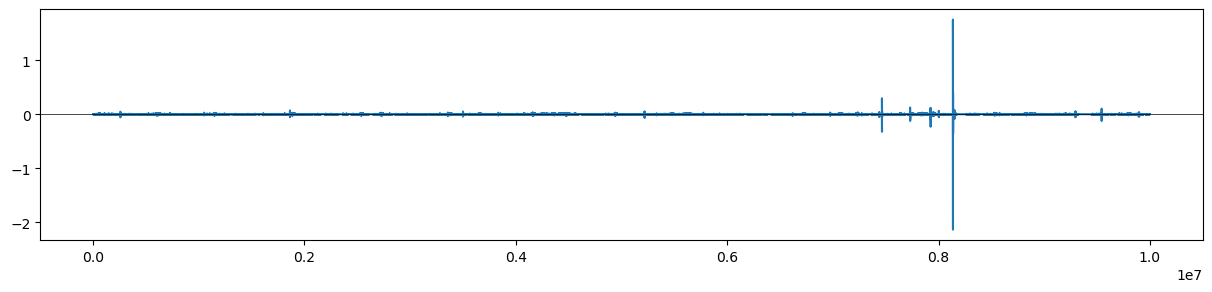

In [10]:
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(st[2].data[int(1e7):int(2e7)])
ax.axhline(0, linewidth=0.5,c='k')

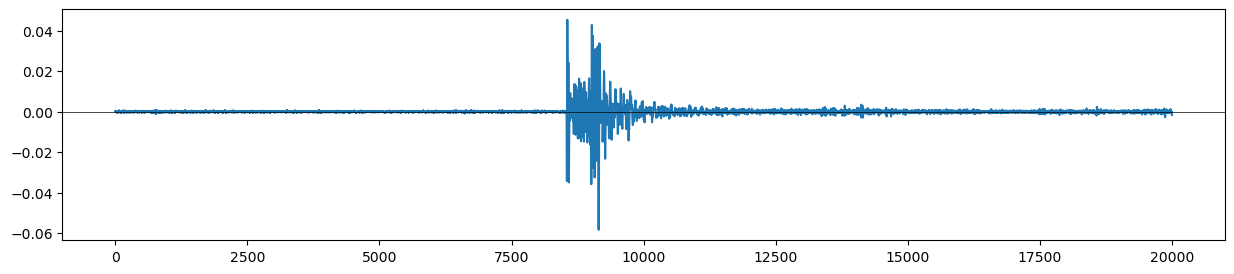

In [11]:
fig,ax = plt.subplots(1,1,figsize=[15,3])
ax.plot(st[2].data[int(1.025e7):int(1.027e7)])
ax.axhline(0, linewidth=0.5,c='k')